<a href="https://colab.research.google.com/github/ahmadrb2006/EndoSLAM/blob/master/KerasBook_code3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# multi-class classification


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
from tensorflow.keras.datasets import reuters
(tr_data, tr_labels), (te_data, te_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [7]:
print(len(tr_data))

print(len(te_data))

print(tr_data.dtype)

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
object


In [8]:
# decoding back to text
word_index=reuters.get_word_index()
reverse_word_index=dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire=" ".join(
    [reverse_word_index.get(i-3, "?") for i in tr_data[10]]
)
print(tr_data[10])
print(decoded_newswire)

565248/550378 [==============================] - 0s 0us/step
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [31]:
# multi-hot encoding the reviews
# since the max word index is 10000, each list is converted into a 10000-element
# vector, with 1's at locations where that number appeared in the review, and 0's 
# for the rest. For example: [2,3]=>[0 0 1 1 0 0 0 ...... 0 0] 

def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j]=1.
  return results

x_train = vectorize_sequences(tr_data)
x_test = vectorize_sequences(te_data)

# print(x_train[0])

y_train = np.asarray(tr_labels).astype("float32")
y_test = np.asarray(te_labels).astype("float32")

print(x_train.shape)

(8982, 10000)


In [32]:
# categorical encoding can be done using Keras internal functions
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(tr_labels)
y_test = to_categorical(te_labels)

print(tr_labels)

print(y_train.shape)

[ 3  4  3 ... 25  3 25]
(8982, 46)


In [40]:
model = keras.Sequential([
                          layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")
]
)

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [41]:
x_val = x_train[:1000]
partial_x_train=x_train[1000:]
y_val = y_train[:1000]
partial_y_train=y_train[1000:]

In [42]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=9,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 29ms/step - loss: 2.6492 - accuracy: 0.4962 - val_loss: 1.7179 - val_accuracy: 0.6420
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4086 - accuracy: 0.7115 - val_loss: 1.2994 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0361 - accuracy: 0.7853 - val_loss: 1.1199 - val_accuracy: 0.7660
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8206 - accuracy: 0.8271 - val_loss: 1.0349 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6499 - accuracy: 0.8624 - val_loss: 0.9691 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5253 - accuracy: 0.8850 - val_loss: 0.9401 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4221 - accuracy: 0.9085 - val_loss: 0.9188 - val_accuracy: 0.8010
Epoch 8/9
16/16 [===

71/71 [==============================] - 0s 3ms/step - loss: 1.0040 - accuracy: 0.7898
[1.0040067434310913, 0.7898486256599426]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


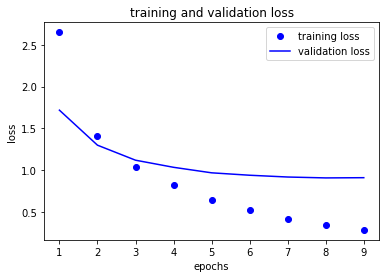

In [43]:
results=model.evaluate(x_test, y_test)
print(results)

# getting history dict
history_dict=history.history
print(history_dict.keys())
# plotting the training and validation loss

loss_values=history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="training loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


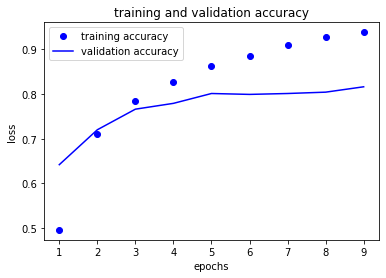

In [45]:
# getting history dict
history_dict=history.history
print(history_dict.keys())
# plotting the training and validation loss

loss_values=history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="training accuracy")
plt.plot(epochs, val_loss_values, "b", label="validation accuracy")
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


In [46]:
import copy
te_labels_copy=copy.copy(te_labels)
np.random.shuffle(te_labels_copy)
hits_array=np.array(te_labels)==np.array(te_labels_copy)
print(hits_array.mean())

0.1803205699020481
